Start the deeplearning tests

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)

Using TensorFlow backend.


In [2]:
print(type(train_data))

<class 'numpy.ndarray'>


In [3]:
word_index = imdb.get_word_index()

In [4]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [5]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 34us/step - loss: 0.5756 - acc: 0.7119 - val_loss: 0.4758 - val_acc: 0.7914
Epoch 2/20
15000/15000 [==============================] - 0s 12us/step - loss: 0.4161 - acc: 0.8307 - val_loss: 0.3862 - val_acc: 0.8419
Epoch 3/20
15000/15000 [==============================] - 0s 11us/step - loss: 0.3546 - acc: 0.8554 - val_loss: 0.3560 - val_acc: 0.8499
Epoch 4/20
15000/15000 [==============================] - 0s 12us/step - loss: 0.3301 - acc: 0.8657 - val_loss: 0.3436 - val_acc: 0.8563
Epoch 5/20
15000/15000 [==============================] - 0s 12us/step - loss: 0.3173 - acc: 0.8678 - val_loss: 0.3372 - val_acc: 0.8615
Epoch 6/20
15000/15000 [==============================] - 0s 12us/step - loss: 0.3077 - acc: 0.8731 - val_loss: 0.3360 - val_acc: 0.8604
Epoch 7/20
15000/15000 [==============================] - 0s 13us/step - loss: 0.3028 - acc: 0.8748 - val_loss: 0.3363 - val_acc

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title('Taining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

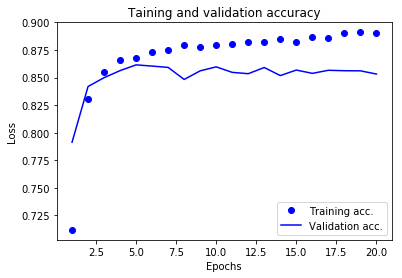

In [11]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc.')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc.')
plt.title('Taining and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 0s 17us/step - loss: 0.5456 - acc: 0.7515
Epoch 2/4
25000/25000 [==============================] - 0s 7us/step - loss: 0.3812 - acc: 0.8462
Epoch 3/4
25000/25000 [==============================] - 0s 7us/step - loss: 0.3346 - acc: 0.8619
Epoch 4/4
25000/25000 [==============================] - 0s 15us/step
[0.33020073481559753, 0.86072]


In [13]:
prediction = model.predict(x_test)
print(prediction.shape)

(25000, 1)


In [14]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [15]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))